## Stock Price Predictor

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
stock = input('Enter the code of the Stock: ')
data = yf.download(stock, "2011-01-01", "2025-1-31", auto_adjust=True)
data.head()

In [10]:
data.shape

(3541, 5)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3541 entries, 2011-01-03 to 2025-01-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   3541 non-null   float64
 1   (High, AAPL)    3541 non-null   float64
 2   (Low, AAPL)     3541 non-null   float64
 3   (Open, AAPL)    3541 non-null   float64
 4   (Volume, AAPL)  3541 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 166.0 KB


In [12]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,3541.000000,3541.000000,3541.000000,3541.000000,3.541000e+03
mean,72.665114,73.370999,71.884632,72.604745,2.027090e+08
std,66.754772,67.378078,66.040677,66.676784,1.886532e+08
min,9.489114,9.560737,9.344063,9.530042,2.323470e+07
25%,20.946154,21.133491,20.743392,20.943955,8.190600e+07
50%,39.427067,39.940282,38.957588,39.363667,1.301024e+08
75%,133.590088,134.684034,131.484501,133.217531,2.608880e+08
max,258.735504,259.814335,257.347047,257.906429,1.880998e+09


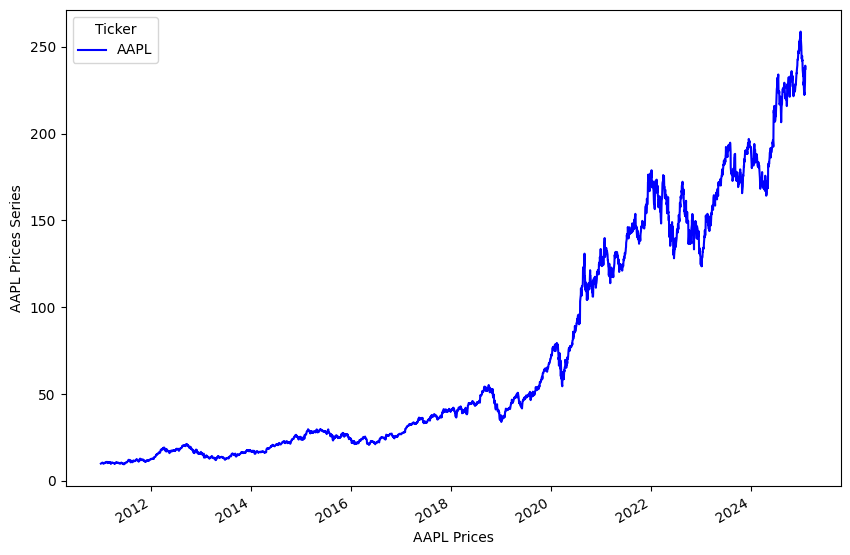

In [14]:
data.Close.plot(figsize=(10,7), color='b')
plt.xlabel(f"{stock} Prices")
plt.ylabel(f"{stock} Prices Series")
plt.show()

<Axes: ylabel='Density'>

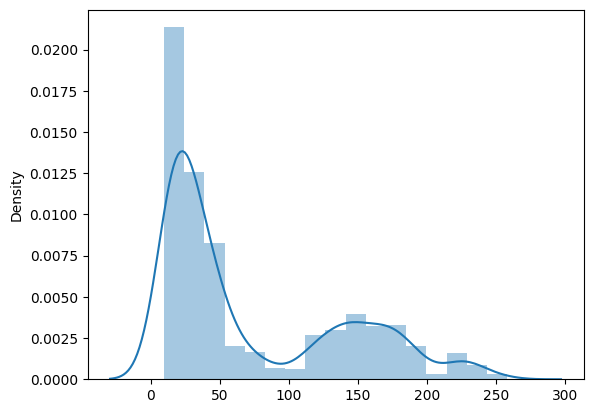

In [15]:
sns.distplot(data.Open)

<Axes: ylabel='Density'>

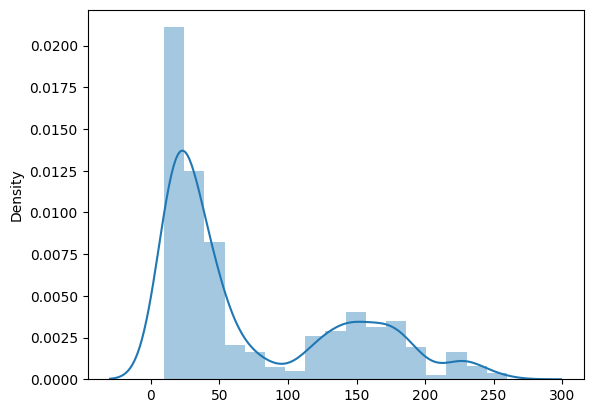

In [16]:
sns.distplot(data.High)

<Axes: ylabel='Density'>

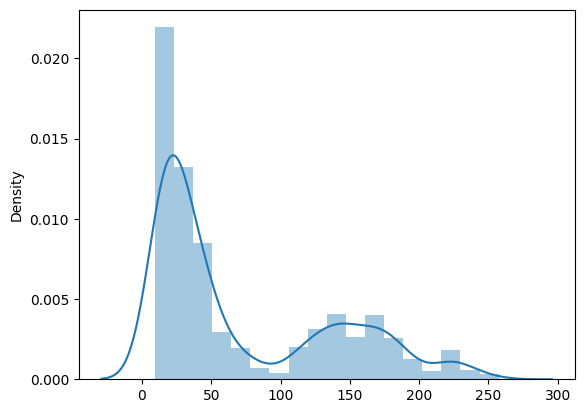

In [17]:
sns.distplot(data.Low)

<Axes: ylabel='Density'>

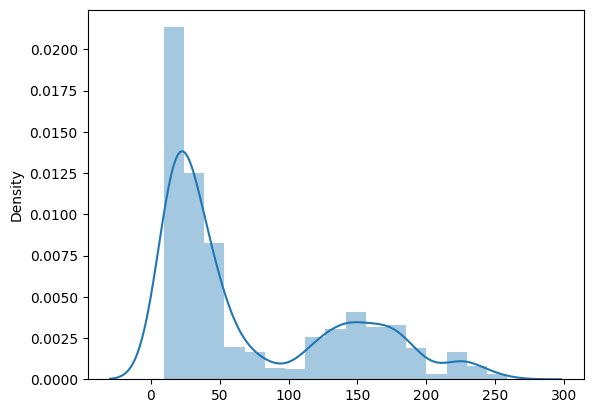

In [18]:
sns.distplot(data.Close)

### Conlusions
- Shape the of the data
- How our data is distributed
- It's is very very non-linear 

In [19]:
X = data.drop('Close', axis = 1)
y = data['Close']

## Training and Testing Dataset

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [21]:
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(2832, 4) (709, 4) (2832, 1) (709, 1)


## Modeling Part

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred = model_lr.predict(X_test)

In [23]:
# Predict value print
pred

array([[ 18.64565788],
       [181.93794407],
       [ 18.27183118],
       [227.23591486],
       [243.4130577 ],
       [ 24.92051453],
       [ 27.96170497],
       [134.324873  ],
       [ 40.89271215],
       [ 17.65131692],
       [ 15.67923096],
       [ 54.1771889 ],
       [ 10.57981324],
       [ 59.96121864],
       [ 19.88124726],
       [119.20293601],
       [137.3326    ],
       [ 16.10852402],
       [182.05598824],
       [ 11.90711314],
       [ 21.6495011 ],
       [  9.71451368],
       [ 27.88143729],
       [143.24124302],
       [165.62522192],
       [ 60.85491092],
       [ 52.04705213],
       [ 18.01309905],
       [129.27980445],
       [ 21.7713911 ],
       [176.30056084],
       [ 24.32711276],
       [ 41.35221846],
       [169.17206297],
       [ 25.62462072],
       [226.99329938],
       [176.04807059],
       [257.28117827],
       [ 15.15879734],
       [ 21.01658714],
       [ 16.19254249],
       [148.70058588],
       [172.22780703],
       [ 88

In [24]:
# MSE (Mean Square Error)
# RMSE (Root Mean Square Error)
# r2_square --> 1.0 -> Very Good Model

from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
    '''
        y_test: ground truth
        y_pred: model predict value
    '''
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scores = r2_score(y_test, y_pred)
    print('*'*50)
    print(f"*  Mean Square Error: {mse}")
    print(f"*  Root Mean Square Error: {rmse}")
    print(f"*  r2_score: {r2_scores}")
    print('*'*50)

calculate_metrics(y_test, pred)

**************************************************
*  Mean Square Error: 0.3444237773833864
*  Root Mean Square Error: 0.5868762879716528
*  r2_score: 0.9999274069742617
**************************************************


### Lasso and Ridge Model

In [25]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso().fit(X_train, y_train)
model_ridge = Ridge().fit(X_train, y_train)

model_lasso_pred = model_lasso.predict(X_test)
model_ridge_pred = model_ridge.predict(X_test)

In [27]:
calculate_metrics(y_test, model_lasso_pred)

calculate_metrics(y_test, model_ridge_pred)

**************************************************
*  Mean Square Error: 0.699718265486039
*  Root Mean Square Error: 0.8364916410138472
*  r2_score: 0.9998525227658733
**************************************************
**************************************************
*  Mean Square Error: 0.3444673530551536
*  Root Mean Square Error: 0.5869134118889715
*  r2_score: 0.9999273977899659
**************************************************


## Support Vector Machine Regression

In [28]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

params_grid = GridSearchCV(SVR(), params, refit=True, verbose=3)
params_grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.186 total time=   0.5s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.239 total time=   0.4s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.258 total time=   0.4s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.302 total time=   0.5s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.294 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.186 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.239 total time=   0.4s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.258 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.302 total time=   0.4s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.294 total time=   0.4s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.186 total time=   0.4s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [29]:
model_svr = SVR(C=10, gamma=0.1, kernel='rbf')
model_svr.fit(X_train, y_train)
svr_pred = model_svr.predict(X_test)

## Model Save

In [30]:
import joblib  

joblib.dump(model_ridge, 'model.pkl') 

ridge_from_joblib = model = joblib.load("model.pkl")